In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline 
from scipy.interpolate import InterpolatedUnivariateSpline 
import glob, re
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from brokenaxes import brokenaxes

C:\Users\14264\AppData\Local\Temp\ipykernel_102344\2591058180.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad=3)


[array([-56.35256803,  56.35256803]), array([-52.18818304,  52.18818304]), array([-45.08353085,  45.08353085])]
[array([-0.01106865,  0.01106865]), array([-0.00892257,  0.00892257]), array([-0.00908328,  0.00908328])]
[array([-0.00964129,  0.00964129]), array([-0.00641609,  0.00641609]), array([-0.00568237,  0.00568237])]
[array([-0.00498614,  0.00498614]), array([-0.00351973,  0.00351973]), array([-0.00334802,  0.00334802])]
[array([-0.0027343,  0.0027343]), array([-0.00237302,  0.00237302]), array([-0.00214286,  0.00214286])]


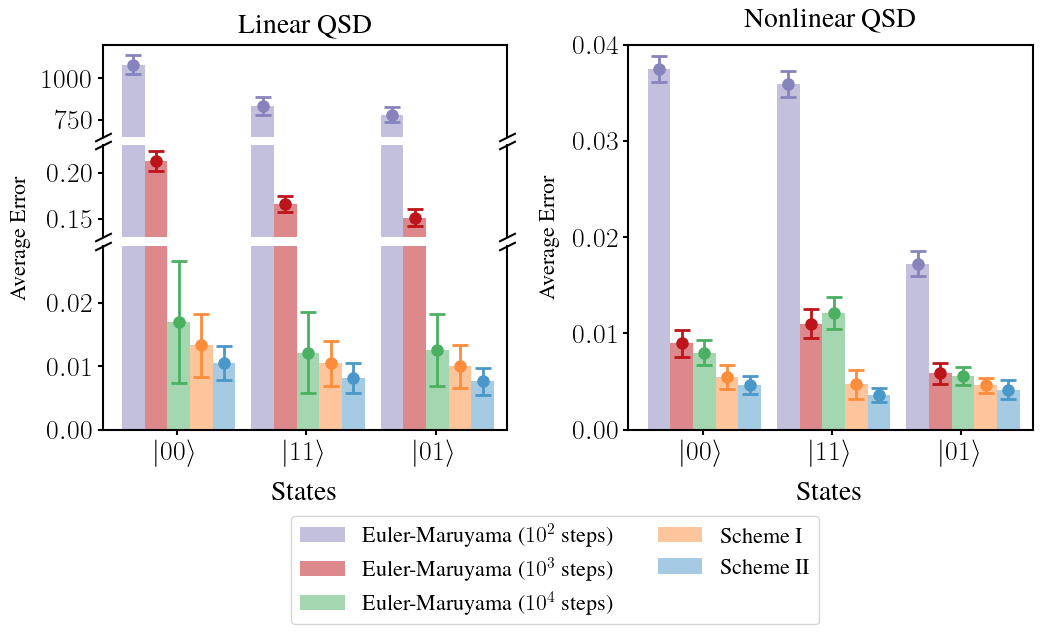

In [14]:
# population figure (Comparision without evolution)
T = 25
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
linear_files_list = glob.glob('TFIM_data/comparison_linear_1000traj_100step_False_*.npz')
nonlinear_files_list = glob.glob('TFIM_data/comparison_nonlinear_1000traj_100step_False_*.npz')
exact = np.load("TFIM_data/comparison_linear_1000traj_100step_False_0.npz")
em_linear_list = glob.glob('TFIM_data/0order_linear_1000traj_10000step_False_*.npz')
em_nonlinear_list = glob.glob('TFIM_data/0order_nonlinear_1000traj_10000step_False_*.npz')
exact_for_em = np.load("TFIM_data/0order_linear_1000traj_10000step_False_1.npz")

em_linear_list_1 = glob.glob('TFIM_data/0order_linear_1000traj_1000step_False_*.npz')
em_nonlinear_list_1 = glob.glob('TFIM_data/0order_nonlinear_1000traj_1000step_False_*.npz')
exact_for_em_1 = np.load("TFIM_data/0order_linear_1000traj_1000step_False_1.npz")
em_linear_list_2 = glob.glob('TFIM_data/0order_linear_1000traj_100step_False_*.npz')
em_nonlinear_list_2 = glob.glob('TFIM_data/0order_nonlinear_1000traj_100step_False_*.npz')
exact_for_em_2 = np.load("TFIM_data/0order_linear_1000traj_100step_False_1.npz")

array_linear_qsd = []
array_nonlinear_qsd = []
array_em_linear = []
array_em_nonlinear = []

array_em_linear_1 = []
array_em_nonlinear_1 = []
array_em_linear_2 = []
array_em_nonlinear_2 = []

for file in linear_files_list:
    data = np.load(file)
    array_linear_qsd.append(data['qsd_result'])

for file in nonlinear_files_list:
    data = np.load(file)
    array_nonlinear_qsd.append(data['qsd_result'])

for file in em_linear_list:
    data = np.load(file)
    array_em_linear.append(data['qsd_result'])

for file in em_nonlinear_list:
    data = np.load(file)
    array_em_nonlinear.append(data['qsd_result'])

for file in em_linear_list_1:
    data = np.load(file)
    array_em_linear_1.append(data['qsd_result'])

for file in em_nonlinear_list_1:
    data = np.load(file)
    array_em_nonlinear_1.append(data['qsd_result'])

for file in em_linear_list_2:
    data = np.load(file)
    array_em_linear_2.append(data['qsd_result'])

for file in em_nonlinear_list_2:
    data = np.load(file)
    array_em_nonlinear_2.append(data['qsd_result'])

exact_T = exact['exact_result'].T
exact_for_em_T = exact_for_em['exact_result'].T
exact_for_em_T_1 = exact_for_em_1['exact_result'].T
exact_for_em_T_2 = exact_for_em_2['exact_result'].T

array_error_linear_M1 = []
array_error_linear_M2 = []
array_error_linear_EM = []
array_error_linear_EM_1 = []
array_error_linear_EM_2 = []
array_error_nonlinear_M1 = []
array_error_nonlinear_M2 = []
array_error_nonlinear_EM = []
array_error_nonlinear_EM_1 = []
array_error_nonlinear_EM_2 = []
array_linear_qsd = np.array(array_linear_qsd)
array_nonlinear_qsd = np.array(array_nonlinear_qsd)
array_em_linear = np.array(array_em_linear)
array_em_nonlinear = np.array(array_em_nonlinear)
array_em_linear_1 = np.array(array_em_linear_1)
array_em_nonlinear_1 = np.array(array_em_nonlinear_1)
array_em_linear_2 = np.array(array_em_linear_2)
array_em_nonlinear_2 = np.array(array_em_nonlinear_2)

for i in range(10):
    error_linear_M1 = np.abs(array_linear_qsd[i,:,:,0] - exact_T)
    array_error_linear_M1.append(error_linear_M1)
    error_linear_M2 = np.abs(array_linear_qsd[i,:,:,1] - exact_T)
    array_error_linear_M2.append(error_linear_M2)
    error_nonlinear_M1 = np.abs(array_nonlinear_qsd[i,:,:,0] - exact_T)
    array_error_nonlinear_M1.append(error_nonlinear_M1)
    error_nonlinear_M2 = np.abs(array_nonlinear_qsd[i,:,:,1] - exact_T)
    array_error_nonlinear_M2.append(error_nonlinear_M2)
    error_linear_EM = np.abs(array_em_linear[i,:,:] - exact_for_em_T)
    array_error_linear_EM.append(error_linear_EM)
    error_nonlinear_EM = np.abs(array_em_nonlinear[i,:,:] - exact_for_em_T)
    array_error_nonlinear_EM.append(error_nonlinear_EM)
    error_linear_EM_1 = np.abs(array_em_linear_1[i,:,:] - exact_for_em_T_1)
    array_error_linear_EM_1.append(error_linear_EM_1)
    error_nonlinear_EM_1 = np.abs(array_em_nonlinear_1[i,:,:] - exact_for_em_T_1)
    array_error_nonlinear_EM_1.append(error_nonlinear_EM_1)
    error_linear_EM_2 = np.abs(array_em_linear_2[i,:,:] - exact_for_em_T_2)
    array_error_linear_EM_2.append(error_linear_EM_2)
    error_nonlinear_EM_2 = np.abs(array_em_nonlinear_2[i,:,:] - exact_for_em_T_2)
    array_error_nonlinear_EM_2.append(error_nonlinear_EM_2)


sum_err_linear_M1 = np.sum(array_error_linear_M1, axis = 1)/len(tlist)
sum_err_linear_M2 = np.sum(array_error_linear_M2, axis = 1)/len(tlist)
sum_err_nonlinear_M1 = np.sum(array_error_nonlinear_M1, axis = 1)/len(tlist)
sum_err_nonlinear_M2 = np.sum(array_error_nonlinear_M2, axis = 1)/len(tlist)
sum_err_linear_EM = np.sum(array_error_linear_EM, axis = 1)/10000
sum_err_nonlinear_EM = np.sum(array_error_nonlinear_EM, axis = 1)/10000
sum_err_linear_EM_1 = np.sum(array_error_linear_EM_1, axis = 1)/1000
sum_err_nonlinear_EM_1 = np.sum(array_error_nonlinear_EM_1, axis = 1)/1000
sum_err_linear_EM_2 = np.sum(array_error_linear_EM_2, axis = 1)/100
sum_err_nonlinear_EM_2 = np.sum(array_error_nonlinear_EM_2, axis = 1)/100

# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# plot the results
fig, ax = plt.subplot_mosaic("""AC
                                BC
                                DC""", 
                            figsize=(12, 5),
                            sharex=True,
                            height_ratios=[1, 1, 2],
                            gridspec_kw={
                                "hspace": 0.07,
                                "wspace": 0.3
                                },
                            )
ax1 = ax['A']
ax2 = ax['C']
ax3 = ax['D']
ax4 = ax['B']

ax1.tick_params(labelbottom=False)
fig.tight_layout(w_pad=3)
ax3.set_xlabel('States', fontsize=font_size, labelpad=10)
ax2.set_xlabel('States', fontsize=font_size, labelpad=10)
T = 25
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
ax1.set_xlim([0,T])
ax2.set_xlim([0,T])

ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax3.spines['top'].set_linewidth(spines_linewidth)
ax3.spines['bottom'].set_linewidth(spines_linewidth)
ax3.spines['left'].set_linewidth(spines_linewidth)
ax3.spines['right'].set_linewidth(spines_linewidth)
ax4.spines['top'].set_linewidth(spines_linewidth)
ax4.spines['bottom'].set_linewidth(spines_linewidth)
ax4.spines['left'].set_linewidth(spines_linewidth)
ax4.spines['right'].set_linewidth(spines_linewidth)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)
ax3.tick_params(width=spines_linewidth, labelsize=font_size)
ax4.tick_params(width=spines_linewidth, labelsize=font_size)
ax1.tick_params(labelsize=font_size)
ax2.tick_params(labelsize=font_size)
ax3.tick_params(labelsize=font_size)
ax4.tick_params(labelsize=font_size)

colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')
colormap_green = plt.get_cmap('Greens')
colormap_red = plt.get_cmap('Reds')
colormap_purple = plt.get_cmap('Purples')

exact_color_per = 0.8
qsd_color_per1 = 0.6
qsd_color_per2 = 0.9

classical_color = 0.4
quantum_color = 0.8
color_1 = [colormap_purple(qsd_color_per1), colormap_red(qsd_color_per1+0.2), colormap_green(qsd_color_per1), colormap_orange(qsd_color_per1-0.1), colormap_blue(qsd_color_per1)]
width = 1.4
legend_labels = [r'$|00\rangle$', r'$|11\rangle$', r'$|01\rangle$']
labels = [r'Euler-Maruyama ($10^2$ steps)', 'Euler-Maruyama ($10^3$ steps)', 'Euler-Maruyama ($10^4$ steps)', 'Scheme I', 'Scheme II']
x = np.arange(3)*8 + 0.5

ax1.xaxis.set_ticks([])
ax1.set_ylim([650, 1200])
ax3.set_ylim([0, 0.029])
ax4.set_ylim([0.13, 0.23])
ax4.spines.top.set_visible(False)
ax3.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.tick_params(bottom=False)
ax4.tick_params(bottom=False)
datas = [sum_err_linear_EM_2, sum_err_linear_EM_1, sum_err_linear_EM, sum_err_linear_M1, sum_err_linear_M2]
multiplier = 1
for i in range(5):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = ax1.bar(x+offset, mean, width, label=labels[i], color=color_1[i], alpha=0.5)
    rects = ax3.bar(x+offset, mean, width, label=labels[i], color=color_1[i], alpha=0.5)
    rects = ax4.bar(x+offset, mean, width, label=labels[i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    print(std)
    ax1.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    ax3.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    ax4.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax4.plot([0, 1], [1, 1], transform=ax4.transAxes, **kwargs)
ax4.plot([0, 1], [0, 0], transform=ax4.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)

ax1.set_xticks(x + width + 2.7, legend_labels)
ax1.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)
ax1.yaxis.set_label_coords(-0.18, -1.1)

ax2.xaxis.set_ticks([])
ax2.set_ylim([0, 0.04])
datas = [sum_err_nonlinear_EM_2, sum_err_nonlinear_EM_1, sum_err_nonlinear_EM, sum_err_nonlinear_M1, sum_err_nonlinear_M2]
multiplier = 1
for i in range(5):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = ax2.bar(x+offset, mean, width, label=labels[i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    ax2.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
ax2.set_xticks(x + width + 2.7, legend_labels)
ax2.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)

ax1.set_title('Linear QSD', fontsize=font_size, y=1.02)
ax2.set_title('Nonlinear QSD', fontsize=font_size, y=1.02)

ax1.legend(fontsize=font_size-4, ncol=2, bbox_to_anchor=(1.8, -4))

plt.savefig('EM_Magnus_Comp.pdf', dpi=600, bbox_inches='tight')

[array([-0.00498614,  0.00498614]), array([-0.00351973,  0.00351973]), array([-0.00334802,  0.00334802])]
[array([-0.0027343,  0.0027343]), array([-0.00237302,  0.00237302]), array([-0.00214286,  0.00214286])]
[array([-0.0075141,  0.0075141]), array([-0.00544393,  0.00544393]), array([-0.00208087,  0.00208087])]
[array([-0.0034676,  0.0034676]), array([-0.00325104,  0.00325104]), array([-0.00258405,  0.00258405])]


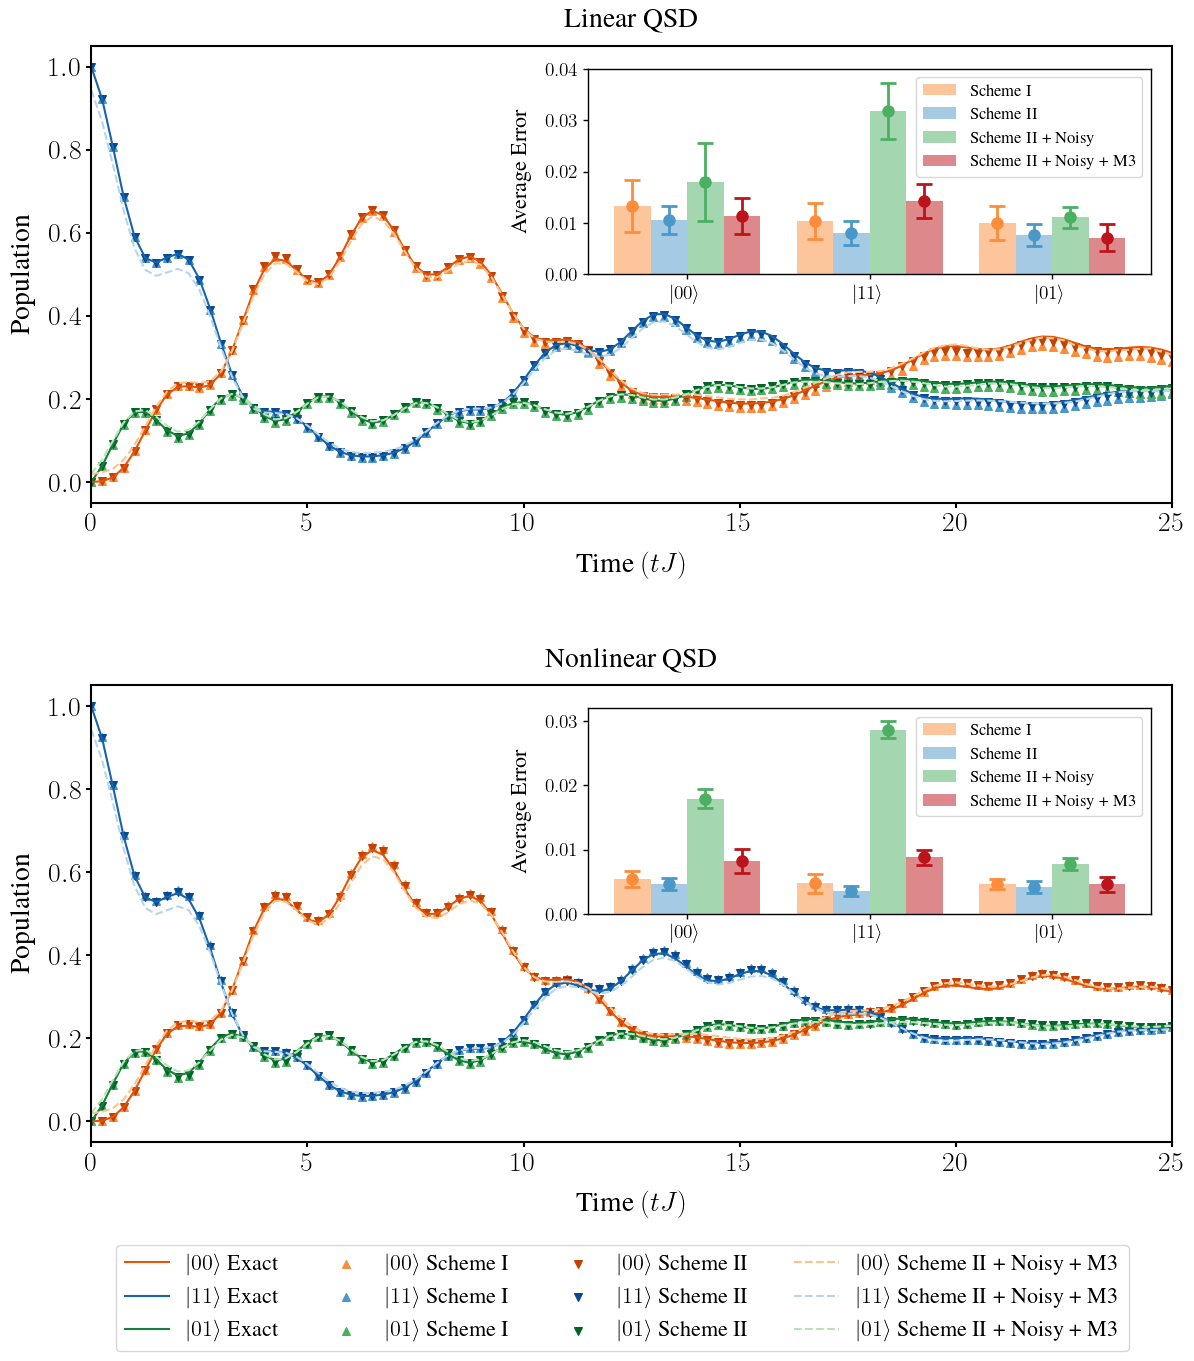

In [15]:
# population figure (With noisy and ideal comparison)
T = 25
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
linear_files_list = glob.glob('TFIM_data/comparison_linear_1000traj_100step_False_*.npz')
nonlinear_files_list = glob.glob('TFIM_data/comparison_nonlinear_1000traj_100step_False_*.npz')
exact = np.load("TFIM_data/comparison_linear_1000traj_100step_False_0.npz")
em_linear_list = glob.glob('Noise_test/(BM_Noisy_True)1000traj_101step_Linear_2order_*_data.npz') # noise + M3
em_nonlinear_list = glob.glob('Noise_test/(BM_Noisy_True)1000traj_101step_Nonlinear_2order_*_data.npz') # noise + M3
wtem_linear_list = glob.glob('Noise_test/(BM_Noisy_True_WithoutM3)1000traj_101step_Linear_2order_*_data.npz')
wtem_nonlinear_list = glob.glob('Noise_test/(BM_Noisy_True_WithoutM3)1000traj_101step_Nonlinear_2order_*_data.npz')

array_linear_qsd = []
array_nonlinear_qsd = []
array_em_linear = []
array_em_nonlinear = []
array_wtem_linear = []
array_wtem_nonlinear = []

for file in linear_files_list:
    data = np.load(file)
    array_linear_qsd.append(data['qsd_result'])

for file in nonlinear_files_list:
    data = np.load(file)
    array_nonlinear_qsd.append(data['qsd_result'])

for file in em_linear_list:
    data = np.load(file)
    array_em_linear.append(data['results'])

for file in em_nonlinear_list:
    data = np.load(file)
    array_em_nonlinear.append(data['results'])

for file in wtem_linear_list:
    data = np.load(file)
    array_wtem_linear.append(data['results'])

for file in wtem_nonlinear_list:
    data = np.load(file)
    array_wtem_nonlinear.append(data['results'])

def get_margin_of_error(data_array):

    mean_values = np.mean(data_array, axis=0)
    std_values = np.std(data_array, axis=0)
    t_value = 3.249
    n_samples = 10
    margin_of_error = t_value * (std_values / np.sqrt(n_samples))

    return mean_values, margin_of_error

mean_values_linear, _ = get_margin_of_error(np.array(array_linear_qsd))
mean_values_nonlinear, _ = get_margin_of_error(np.array(array_nonlinear_qsd))
mean_values_em_linear, _ = get_margin_of_error(np.average(np.array(array_em_linear), axis=1))
mean_values_em_nonlinear, _ = get_margin_of_error(np.average(np.array(array_em_nonlinear), axis=1))
mean_values_wtem_linear, _ = get_margin_of_error(np.average(np.array(array_wtem_linear), axis=1))
mean_values_wtem_nonlinear, _ = get_margin_of_error(np.average(np.array(array_wtem_nonlinear), axis=1))

exact_T = exact['exact_result'].T

array_error_linear_M1 = []
array_error_linear_M2 = []
array_error_linear_EM = []
array_error_linear_wtem = []
array_error_nonlinear_M1 = []
array_error_nonlinear_M2 = []
array_error_nonlinear_EM = []
array_error_nonlinear_wtem = []
array_linear_qsd = np.array(array_linear_qsd)
array_nonlinear_qsd = np.array(array_nonlinear_qsd)
array_em_linear = np.array(array_em_linear)
array_em_nonlinear = np.array(array_em_nonlinear)
array_wtem_linear = np.array(array_wtem_linear)
array_wtem_nonlinear = np.array(array_wtem_nonlinear)

for i in range(10):
    error_linear_M1 = np.abs(array_linear_qsd[i,:,:,0] - exact_T)
    array_error_linear_M1.append(error_linear_M1)
    error_linear_M2 = np.abs(array_linear_qsd[i,:,:,1] - exact_T)
    array_error_linear_M2.append(error_linear_M2)
    error_nonlinear_M1 = np.abs(array_nonlinear_qsd[i,:,:,0] - exact_T)
    array_error_nonlinear_M1.append(error_nonlinear_M1)
    error_nonlinear_M2 = np.abs(array_nonlinear_qsd[i,:,:,1] - exact_T)
    array_error_nonlinear_M2.append(error_nonlinear_M2)
    error_linear_EM = np.abs(np.average(array_em_linear[i,:,:,:], axis=0) - exact_T)
    array_error_linear_EM.append(error_linear_EM)
    error_nonlinear_EM = np.abs(np.average(array_em_nonlinear[i,:,:,:], axis=0) - exact_T)
    array_error_nonlinear_EM.append(error_nonlinear_EM)
    error_linear_wtem = np.abs(np.average(array_wtem_linear[i,:,:,:], axis=0) - exact_T)
    array_error_linear_wtem.append(error_linear_wtem)
    error_nonlinear_wtem = np.abs(np.average(array_wtem_nonlinear[i,:,:,:], axis=0) - exact_T)
    array_error_nonlinear_wtem.append(error_nonlinear_wtem)

sum_err_linear_M1 = np.sum(array_error_linear_M1, axis = 1)/len(tlist)
sum_err_linear_M2 = np.sum(array_error_linear_M2, axis = 1)/len(tlist)
sum_err_nonlinear_M1 = np.sum(array_error_nonlinear_M1, axis = 1)/len(tlist)
sum_err_nonlinear_M2 = np.sum(array_error_nonlinear_M2, axis = 1)/len(tlist)
sum_err_linear_EM = np.sum(array_error_linear_EM, axis = 1)/len(tlist)
sum_err_nonlinear_EM = np.sum(array_error_nonlinear_EM, axis = 1)/len(tlist)
sum_err_linear_wtem = np.sum(array_error_linear_wtem, axis = 1)/len(tlist)
sum_err_nonlinear_wtem = np.sum(array_error_nonlinear_wtem, axis = 1)/len(tlist)

# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.tight_layout(h_pad=5)
ax1.set_xlim([0,T])
ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax2.set_xlim([0,T])
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)

legend_labels_exact = [r'$|00\rangle$ Exact', r'$|11\rangle$ Exact', r'$|01\rangle$ Exact']
legend_labels_M1 = [r'$|00\rangle$ Scheme I', r'$|11\rangle$ Scheme I', r'$|01\rangle$ Scheme I']
legend_labels_M2 = [r'$|00\rangle$ Scheme II', r'$|11\rangle$ Scheme II', r'$|01\rangle$ Scheme II']
legend_labels_EM = [r'$|00\rangle$ Scheme II + Noisy + M3', r'$|11\rangle$ Scheme II + Noisy + M3', r'$|01\rangle$ Scheme II + Noisy + M3']

colormap_red = plt.get_cmap('Reds')
colormap_green = plt.get_cmap('Greens')
colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')
colormap_purple = plt.get_cmap('Purples')

exact_color_per = 0.8
qsd_color_per1 = 0.6
qsd_color_per2 = 0.9

color_exact = [colormap_orange(exact_color_per-0.1), 
               colormap_blue(exact_color_per), 
               colormap_green(exact_color_per), 
               colormap_red(exact_color_per+0.1)]
color_1 = [colormap_orange(qsd_color_per1-0.1), 
                colormap_blue(qsd_color_per1), 
                colormap_green(qsd_color_per1), 
                colormap_red(qsd_color_per1+0.2)]
color_2 = [colormap_orange(qsd_color_per2-0.1), 
                colormap_blue(qsd_color_per2), 
                colormap_green(qsd_color_per2), 
                colormap_red(qsd_color_per2+0.2)]
color_3 = [colormap_orange(qsd_color_per2-0.6), 
                colormap_blue(qsd_color_per2-0.6), 
                colormap_green(qsd_color_per2-0.6), 
                colormap_red(qsd_color_per2)]

for i in range(3):
    ax1.plot(tlist, exact['exact_result'][i, :], linewidth=linewidth, label=legend_labels_exact[i], color=color_exact[i])
for i in range(3):
    ax1.scatter(tlist, mean_values_linear[:, i, 0], s=30, label=legend_labels_M1[i], color=color_1[i], marker='^')
for i in range(3):
    ax1.scatter(tlist, mean_values_linear[:, i, 1], s=30, label=legend_labels_M2[i], color=color_2[i], marker='v')
for i in range(3):
    ax1.plot(tlist, mean_values_em_linear[:, i], label=legend_labels_EM[i], color=color_3[i], linestyle='--')
# for i in range(3):
#     ax1.plot(tlist, mean_values_wtem_linear[:, i], label=legend_labels_EM[i], color="black", linestyle='--')

for i in range(3):
    ax2.plot(tlist, exact['exact_result'][i, :], linewidth=linewidth, label=legend_labels_exact[i], color=color_exact[i])
for i in range(3):
    ax2.scatter(tlist, mean_values_nonlinear[:, i, 0], s=30, label=legend_labels_M1[i], color=color_1[i], marker='^')
for i in range(3):
    ax2.scatter(tlist, mean_values_nonlinear[:, i, 1], s=30, label=legend_labels_M2[i], color=color_2[i], marker='v')
for i in range(3):
    ax2.plot(tlist, mean_values_em_nonlinear[:, i], label=legend_labels_EM[i], color=color_3[i], linestyle='--')
# for i in range(3):
#     ax2.plot(tlist, mean_values_wtem_nonlinear[:, i], label=legend_labels_EM[i], color="black", linestyle='--')
 
legend_labels = [r'$|00\rangle$', r'$|11\rangle$', r'$|01\rangle$']
width = 0.2
multiplier = 0.5
x = np.arange(3)
axins_1 = ax1.inset_axes((0.46, 0.5, 0.52, 0.45))
axins_1.spines['top'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['right'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['bottom'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['left'].set_linewidth(spines_linewidth-0.5)
axins_1.tick_params(width=spines_linewidth-0.5, labelsize=font_size-6)
axins_1.xaxis.set_ticks([])
axins_1.set_ylim([0, 0.04])
datas = [sum_err_linear_M1, sum_err_linear_M2, sum_err_linear_wtem, sum_err_linear_EM, ]
for i in range(4):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = axins_1.bar(x+offset, mean, width, label=['Scheme I', 'Scheme II', 'Scheme II + Noisy', 'Scheme II + Noisy + M3'][i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    print(std)
    axins_1.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
axins_1.set_xticks(x + width + 0.2, legend_labels)
axins_1.legend(fontsize=font_size-8, ncol=1)
axins_1.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)

legend_labels = [r'$|00\rangle$', r'$|11\rangle$', r'$|01\rangle$']
width = 0.2
multiplier = 0.5
x = np.arange(3)
axins_2 = ax2.inset_axes((0.46, 0.5, 0.52, 0.45))
axins_2.spines['top'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['right'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['bottom'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['left'].set_linewidth(spines_linewidth-0.5)
axins_2.tick_params(width=spines_linewidth-0.5, labelsize=font_size-6)
axins_2.xaxis.set_ticks([])
axins_2.set_ylim([0, 0.032])
datas = [sum_err_nonlinear_M1, sum_err_nonlinear_M2, sum_err_nonlinear_wtem, sum_err_nonlinear_EM]
for i in range(4):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = axins_2.bar(x+offset, mean, width, label=['Scheme I', 'Scheme II', 'Scheme II + Noisy', 'Scheme II + Noisy + M3'][i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    axins_2.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
axins_2.set_xticks(x + width + 0.2, legend_labels)
axins_2.legend(fontsize=font_size-8, ncol=1)
axins_2.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)

ax1.set_title(r'{Linear QSD}', fontsize=font_size, y=1.02)
ax2.set_title(r'{Nonlinear QSD}', fontsize=font_size, y=1.02)
ax1.set_xlabel(r'{Time $(tJ)$}', fontsize=font_size, labelpad=10)
ax1.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.set_xlabel(r'{Time $(tJ)$}', fontsize=font_size, labelpad=10)
ax2.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)

ax2.legend(fontsize=font_size-4, ncol=4, bbox_to_anchor=(0.97, -0.2))

plt.savefig('TFIM_noisy_ideal_comp.pdf', dpi=600, bbox_inches='tight')